## Unsupervised Learning - K Means Clustering

In [5]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [6]:
# Load the dataset
df = pd.read_csv('environmental factors.csv')
df

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814
...,...,...,...,...,...,...
9995,32.153120,82.622318,24.045509,389.315259,660.200681,96.614073
9996,32.950177,32.808837,19.956484,394.037121,303.574216,37.323996
9997,33.934158,48.221908,5.389117,171.306244,774.095576,30.467486
9998,22.949760,56.599200,13.020097,245.443897,568.909821,40.736253


In [8]:
# Normalise the data - StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
# Display the scaled data
print(pd.DataFrame(scaled_df, columns=df.columns).head())

   temperature  humidity  wind_speed  carbon_emissions  solar_irradiance  pollution_level
0    -0.415900 -0.452465    0.801884          0.482494         -0.684316         1.193409
1     1.587377 -0.593258   -1.100359         -0.136414         -1.389866        -0.029923
2     0.826917 -1.135149   -0.534981          1.611824         -1.280827        -1.067119
3     0.363328  0.355146    0.569224         -0.968007         -1.093072         0.809835
4    -1.175669 -0.096466   -0.062635          0.308475         -1.013623        -0.292954


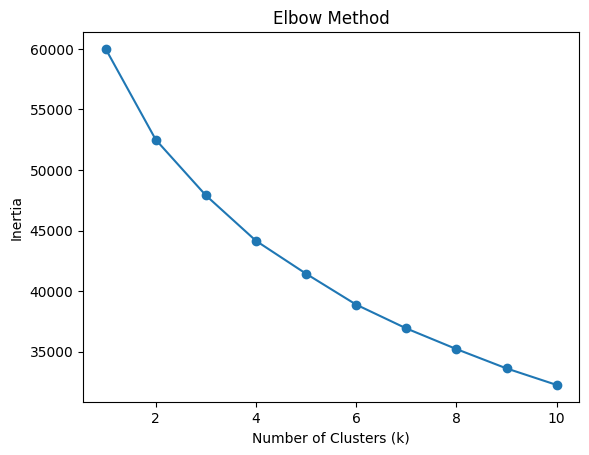

In [10]:
# use elbow method to find the optimal no. of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
#plot the inertia values to find the elbow 
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [12]:
# Applying K means clustering with k = 7
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_df)
df.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level,cluster
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658,6
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704,5
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561,6
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179,4
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814,6


In [14]:
# cAlculate the silhouette score
sil_score = silhouette_score(scaled_df, df['cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.12205646149181477


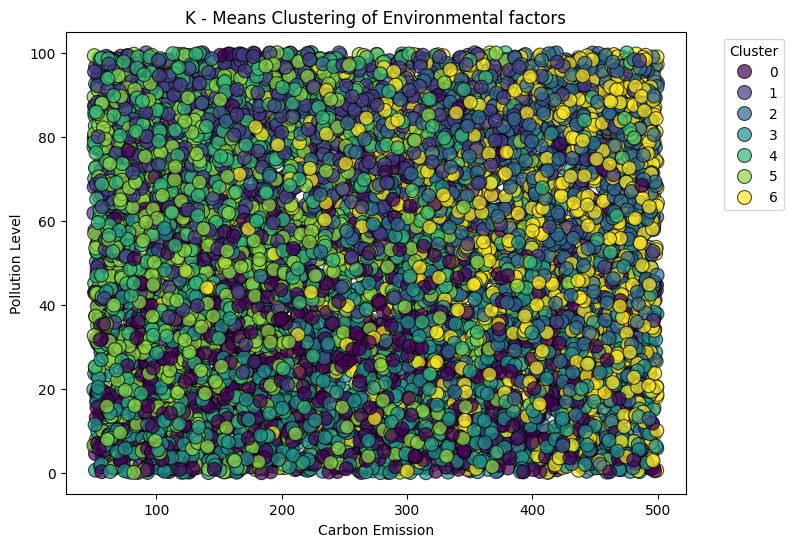

In [18]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='carbon_emissions', y='pollution_level', hue='cluster',data=df,palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title('K - Means Clustering of Environmental factors')
plt.xlabel("Carbon Emission")
plt.ylabel("Pollution Level")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()